### Uber Data Analsysis With Python

**Uber Technologies, Inc**., commonly known as Uber, is ans American technology company. Its services include ride-hailing, food delivery, package
delivery, couriers, freight tranportation, and through a partnership with Lime, electric bicycle and motorized scooter rental.

But, we will mainly use data regarding **Uber ride** and use **Python** to analyse the data.

We wish to answer the below following question:
- Check how long do people travel with Uber?
- What Hour Do Most People take Uber To Their Destination?
- Check The purpose of trips
- Which Day has the highest number of trips
- What are the number of trips per each day?
- What are the trips in the month
- The starting points of trips. Where do people start boarding their trip from Most?

### Import the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

### Importing Dataset

In [3]:
data = pd.read_csv("Uber Drives.csv")

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Check for Missing Values

In [4]:
data.isnull().any() # it will check for each column, return True if any one value is null

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

> *So, END_DATE, CATEGORY, START, STOP, PURPOSE column have missing values in it.*

In [5]:
# to check for how many

data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

We will drop all the NaN values from our dataset.

**NOTE**: Dropping a value in your dataset should be the last option to consider. There are better ways to deal with missing values.

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

> *Don't have missing values anymore.*

### Checking Data type

In [8]:
# Checking data type

data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

> We should convert START_DATE* and END_DATE* to datetime data type for easier date and time calculations.

In [9]:
# Converting to appropriate data type

#data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d%Y %H:%M')
#data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d%Y %H:%M')

data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = 'mixed')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = 'mixed')

In [10]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [11]:
# extracting and adding columns related to date and time that we might need

hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)  # Mon - 1
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]]) #
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [12]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### Categories

In [24]:
print(data['CATEGORY*'].value_counts())

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64


<Axes: xlabel='CATEGORY*', ylabel='count'>

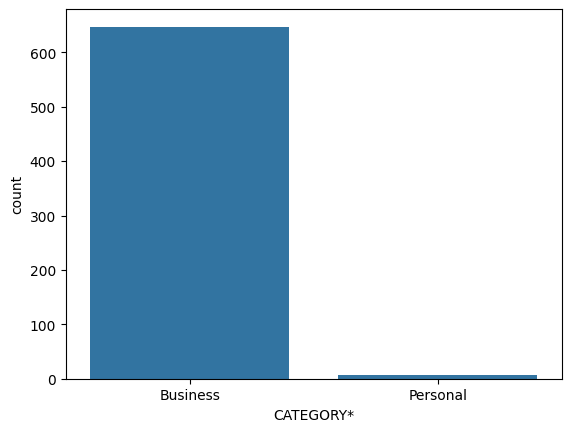

In [14]:
sns.countplot(x = 'CATEGORY*', data = data)

> - **Personal** means, when people hire UBER for a day or for a long-trip.
> - **Business** means, people booking UBER to travel to a certain destination.

### How long do people travel with UBER?

<Axes: ylabel='Frequency'>

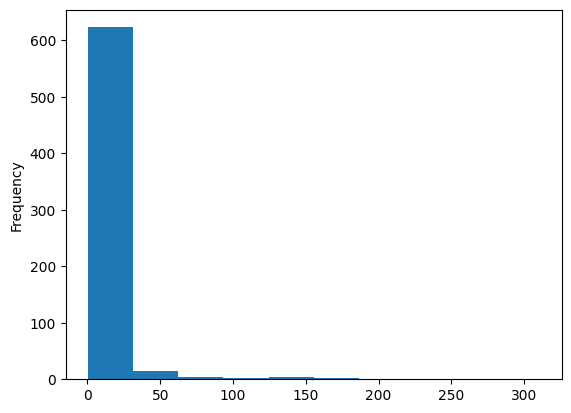

In [14]:
data['MILES*'].plot.hist()

> *Most people book a ride for short distance, like for 1-50 miles.*

### What hour do most people take UBER to their Destination?

In [16]:
hours = data['START_DATE*'].dt.hour.value_counts()

print(hours)

START_DATE*
13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

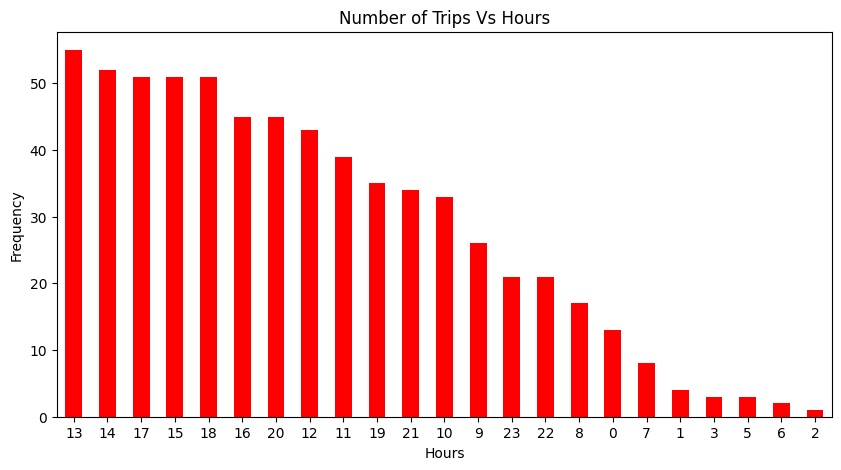

In [16]:
hours.plot(kind = 'bar', color = 'red', figsize=(10,5))

plt.title('Number of Trips Vs Hours')
plt.xlabel('Hours')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')


> *Most of the Trips is at 1:00 PM, 2:00 PM, then 5:00 PM, 3:00 PM. UBER can make use of this information for advertise, target people and offer discount.*

### Check the Purpose of Trips

In [18]:
# with this info, UBER will know which offer to give, what kind of advertisment to run.

print(data['PURPOSE*'].value_counts())


PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


<Axes: xlabel='PURPOSE*'>

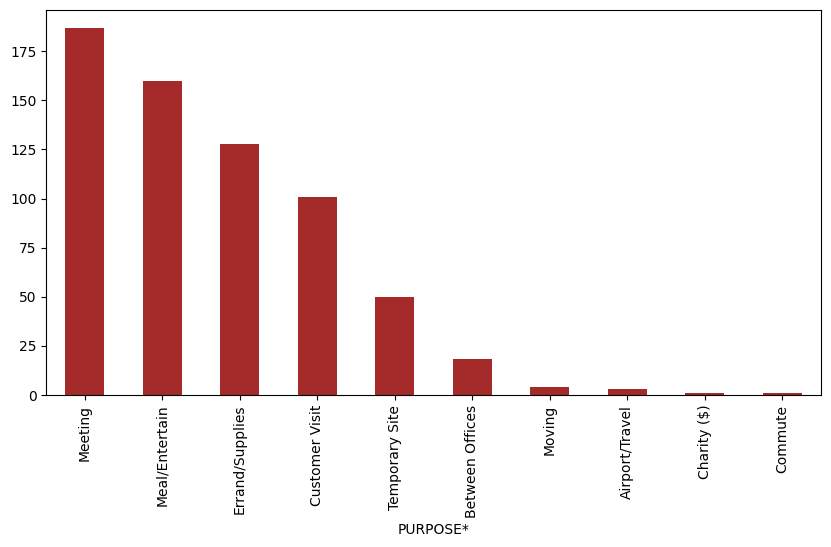

In [19]:
data['PURPOSE*'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'brown')

> *Bost of the rider is for Meeting Purpose.* <br>
**HINT**: For your next meeting, we are offering you 10% discount.

### Which day has the highest Number of Trips

In [21]:
print(data['WEEKDAY'].value_counts())

WEEKDAY
Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64


<Axes: xlabel='WEEKDAY'>

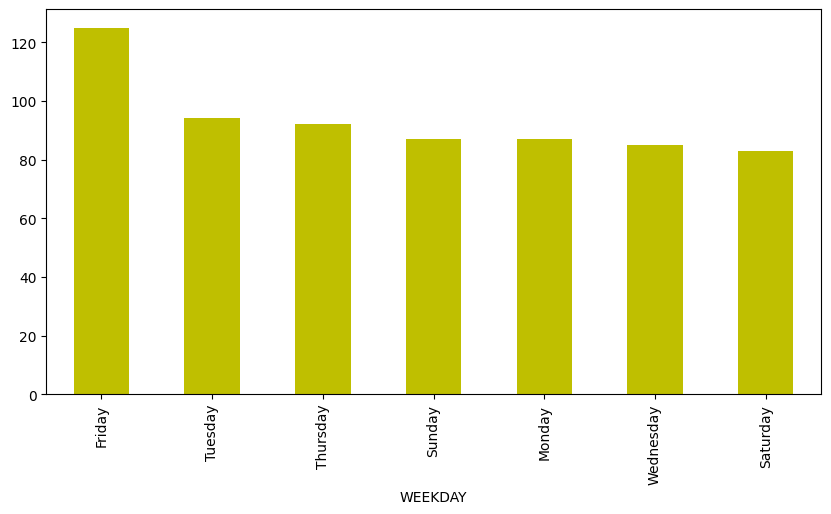

In [22]:
data['WEEKDAY'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'y')

> ***FRIDAY** has the most number of Trip.*

### What are the Number of Trips per Each Day?

<Axes: xlabel='DAY'>

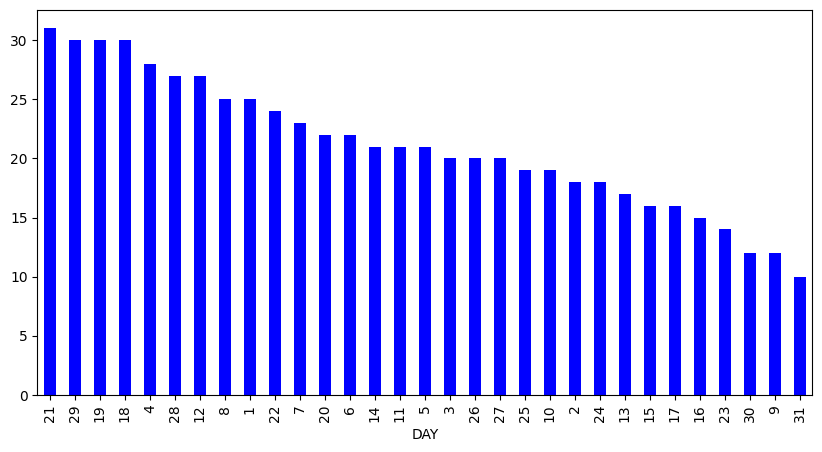

In [21]:
data['DAY'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'blue')


### What Are The Trips In The Month?

<Axes: xlabel='MONTH'>

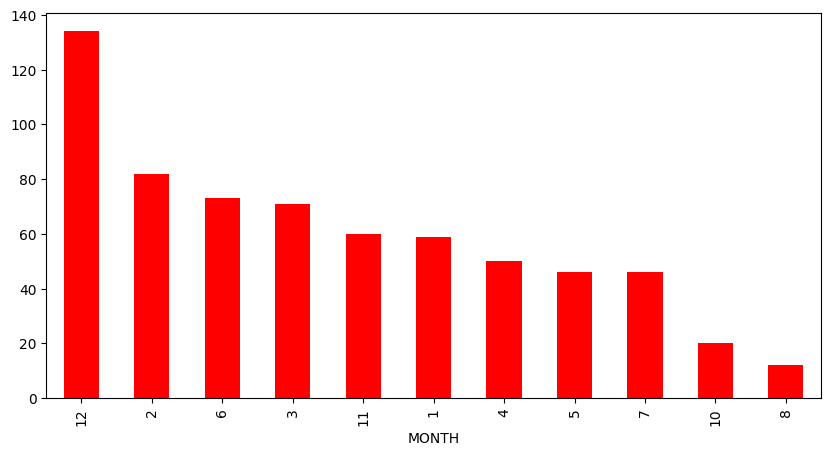

In [22]:
data['MONTH'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'red')

### The starting points of trips. Where Do People Start Boarding Their Trip From Most?

In [23]:
print(data['START*'].value_counts())

START*
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: count, Length: 131, dtype: int64


<Axes: xlabel='START*'>

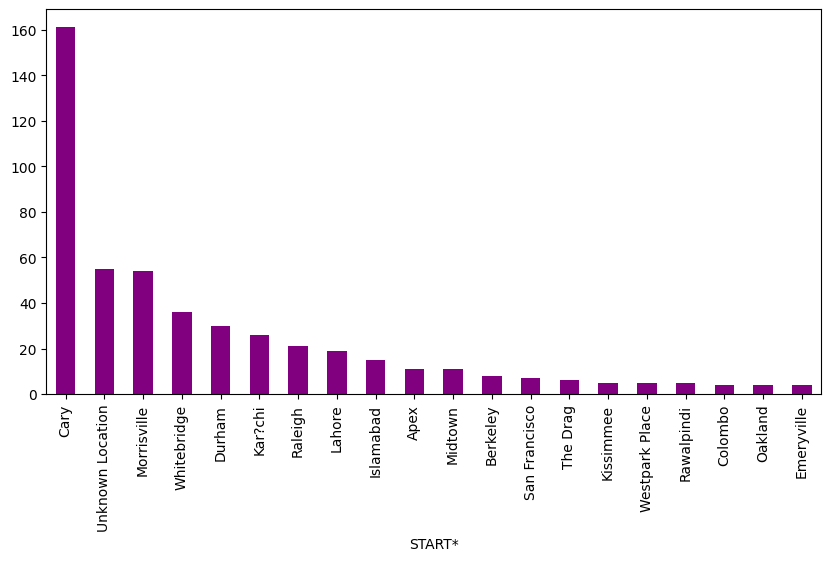

In [24]:
data['START*'].value_counts()[:20].plot(kind = 'bar', figsize = (10, 5), color = 'purple')